# Autoregressive Integrated Moving Average (ARIMA)

To complete this assessment, fill in your responses in the cells with commented instructions applying ARIMA and Rolling Forecasts. When finished, push your notebook to Github and upload a link to your repository on the LMS.

In [8]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
from sklearn.metrics import mean_squared_error
# from google.colab import files

!ls
# !rm "day.csv"
#  uploaded = files.upload()

#  Here we are using a dataset on the number of bicycles checkouts from a bike sharing service for a 3 month period
# cnt refers to the count of bicycle checkouts

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [9]:
# load in your data "day.csv"
series = read_csv("day.csv", header=0, parse_dates=[1], index_col=1, squeeze=True)

# preview your data
series.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,
2011-01-01,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985.0
2011-01-02,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801.0
2011-01-03,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349.0
2011-01-04,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562.0
2011-01-05,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600.0


In [10]:
# choose your column : cnt
Count = series['cnt']

Perform a quick plot to understand/visualise what the data looks like.

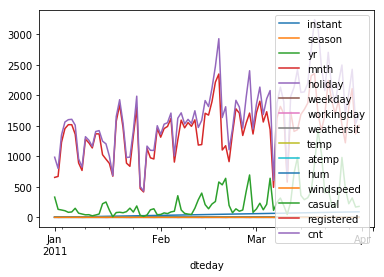

In [11]:
series.plot()
pyplot.show()

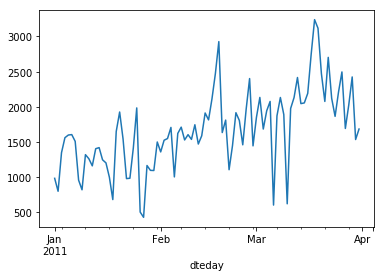

In [12]:
Count.plot()
pyplot.show()

[link text] You should see a general increase in the dataset which we can refer to as a trend.  

This suggests that the time series is not stationary and will require differencing to make it stationary.  
This means we are going to try to take out the trend component: d = 1

## p, d, q (arima parameters)

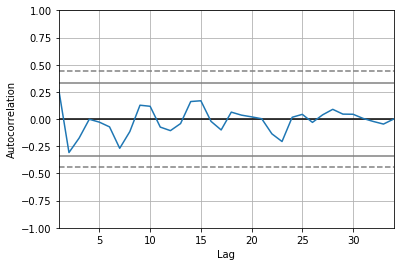

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


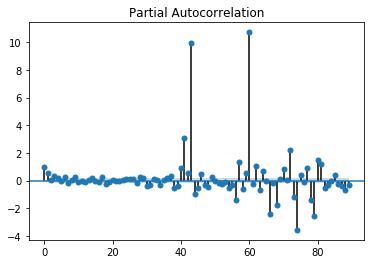

In [14]:
# autocorrelate you data
autocorrelation_plot(Count[1:35])
pyplot.show()

# pacf function

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_pacf(Count)
pyplot.show()

Get your pdq values to experiment with and fit the model

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                  D.cnt   No. Observations:                   89
Model:                 ARIMA(5, 1, 2)   Log Likelihood                -662.203
Method:                       css-mle   S.D. of innovations            403.049
Date:                Sat, 21 Jul 2018   AIC                           1342.406
Time:                        23:06:19   BIC                           1364.804
Sample:                    01-02-2011   HQIC                          1351.434
                         - 03-31-2011                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          13.3723      2.584      5.174      0.000       8.307      18.437
ar.L1.D.cnt    -0.1530      0.248     -0.616      0.539      -0.640       0.333
ar.L2.D.cnt     0.0552      0.132      0.420    

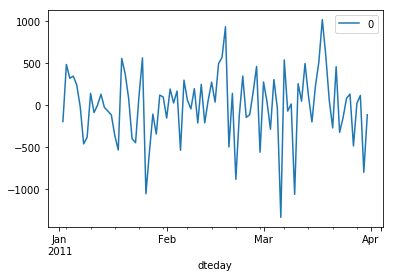

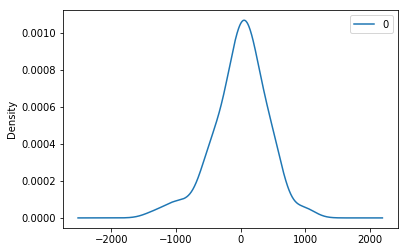

                 0
count    89.000000
mean     -5.090738
std     412.067548
min   -1338.201399
25%    -201.826182
50%      40.287062
75%     246.059992
max    1016.568411


In [15]:
# fit the model

# model = ARIMA(series, order=(5,1,3)) # first model still showed some trend so we try (5,2,3)
# model = ARIMA(series, order=(5,2,3)) # gave convergence warning
# model = ARIMA(series, order=(5,2,2)) # gave an error
model = ARIMA(Count, order=(5,1,2))   
model_fit = model.fit(disp=0)
print(model_fit.summary())

# plot residual errors

residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

## Rolling Forecast
We now try to use the model to predict future responses.  

predicted=1515.849700, expected=1851.000000
predicted=2052.182269, expected=2134.000000
predicted=1980.299459, expected=1685.000000
predicted=1705.636855, expected=1944.000000
predicted=2139.799330, expected=2077.000000
predicted=1912.430807, expected=605.000000
predicted=1159.169713, expected=1872.000000
predicted=2139.699534, expected=2133.000000
predicted=1655.513576, expected=1891.000000
predicted=1809.604072, expected=623.000000
predicted=1483.716103, expected=1977.000000
predicted=1696.958189, expected=2132.000000
predicted=1737.477808, expected=2417.000000
predicted=1827.870417, expected=2046.000000
predicted=2101.619461, expected=2056.000000
predicted=1756.656589, expected=2192.000000
predicted=2234.213267, expected=2744.000000
predicted=2397.871962, expected=3239.000000
predicted=2721.032103, expected=3117.000000
predicted=2677.886281, expected=2471.000000
predicted=2567.560666, expected=2077.000000
predicted=2532.014705, expected=2703.000000
predicted=2902.034288, expected=21

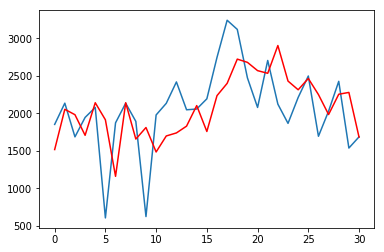

In [16]:
# model prediction
X = Count.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

# plot
#interpretation of your plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()